### EDA on database of school websites

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
db_path = "../site_info_2025-01-08.db"
conn = sqlite3.connect(db_path)

# Query all tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

print("Tables in the database:")
print(tables) # domains, sites, questions, site_category

Tables in the database:
            name
0        domains
1          sites
2      questions
3  site_category


Querying each table

In [12]:
table_name = "sites"
query = f"SELECT * FROM {table_name} LIMIT 5;"

data = pd.read_sql(query, conn)
print(data)

   id           created_at                                              url  \
0   1  2025-01-01 23:15:50                     https://www.comp.nus.edu.sg/   
1   2  2025-01-01 23:15:52  https://www.comp.nus.edu.sg/about/deansmessage/   
2   3  2025-01-01 23:15:52               https://www.comp.nus.edu.sg/about/   
3   4  2025-01-01 23:15:53   https://www.comp.nus.edu.sg/about/our-history/   
4   5  2025-01-01 23:15:53        https://www.comp.nus.edu.sg/about/awards/   

                                        loaded_url     site  from_site_id  \
0                     https://www.comp.nus.edu.sg/  nus-soc           NaN   
1  https://www.comp.nus.edu.sg/about/deansmessage/  nus-soc           1.0   
2               https://www.comp.nus.edu.sg/about/  nus-soc           1.0   
3   https://www.comp.nus.edu.sg/about/our-history/  nus-soc           1.0   
4        https://www.comp.nus.edu.sg/about/awards/  nus-soc           1.0   

   depth  num_links  num_imgs                            title

Merging sites table and site_category table

In [4]:
query = """
    SELECT 
        sites.id AS site_id, 
        sites.site AS site_name, 
        site_category.category,
        sites.url AS url,
        sites.loaded_url AS loaded_url,
        sites.from_site_id AS from_site_id,
        sites.depth AS depth,
        sites.num_links AS num_links,
        sites.num_imgs AS num_imgs,
        sites.title AS title,
        sites.text_content AS text_content
    FROM 
        sites
    INNER JOIN 
        site_category
    ON 
        sites.id = site_category.id;
    """
    
merged_df = pd.read_sql(query, conn)
print(merged_df.head())

   site_id site_name                           category  \
0        1   nus-soc               About the university   
1        2   nus-soc               About the university   
2        3   nus-soc               About the university   
3        4   nus-soc               About the university   
4        5   nus-soc  Teaching and administrative roles   

                                               url  \
0                     https://www.comp.nus.edu.sg/   
1  https://www.comp.nus.edu.sg/about/deansmessage/   
2               https://www.comp.nus.edu.sg/about/   
3   https://www.comp.nus.edu.sg/about/our-history/   
4        https://www.comp.nus.edu.sg/about/awards/   

                                        loaded_url  from_site_id  depth  \
0                     https://www.comp.nus.edu.sg/           NaN      0   
1  https://www.comp.nus.edu.sg/about/deansmessage/           1.0      1   
2               https://www.comp.nus.edu.sg/about/           1.0      1   
3   https://www.comp

Creating dataframes for each university

In [5]:
nus_df = merged_df[merged_df['site_name'] == 'nus']
soc_df = merged_df[merged_df['site_name'] == 'nus-soc']
ntu_df = merged_df[merged_df['site_name'] == 'ntu']
sutd_df = merged_df[merged_df['site_name'] == 'sutd']
sim_df = merged_df[merged_df['site_name'] == 'sim']
sit_df = merged_df[merged_df['site_name'] == 'sit']
cmu_df = merged_df[merged_df['site_name'] == 'cmu']
mit_df = merged_df[merged_df['site_name'] == 'mit']
berkeley_df = merged_df[merged_df['site_name'] == 'berkeley']

In [6]:
# defining constants
university_df = [nus_df, soc_df, ntu_df, sutd_df, sim_df, sit_df, cmu_df, mit_df, berkeley_df]
university_names = ['nus', 'soc', 'ntu', 'sutd', 'sim', 'sit', 'cmu', 'mit', 'berkeley']

Total number of pages

In [19]:
total_pages_dict = {} # dictionary to store page count

for i in range(9):
    count = university_df[i].shape[0]
    total_pages_dict[university_names[i]] = count

sorted_total_pages_dict = dict(sorted(total_pages_dict.items(), key=lambda item: item[1], reverse=True)) # sort
print(sorted_total_pages_dict)

{'nus': 1072, 'cmu': 734, 'sit': 699, 'soc': 681, 'sim': 563, 'ntu': 522, 'berkeley': 284, 'sutd': 233, 'mit': 38}


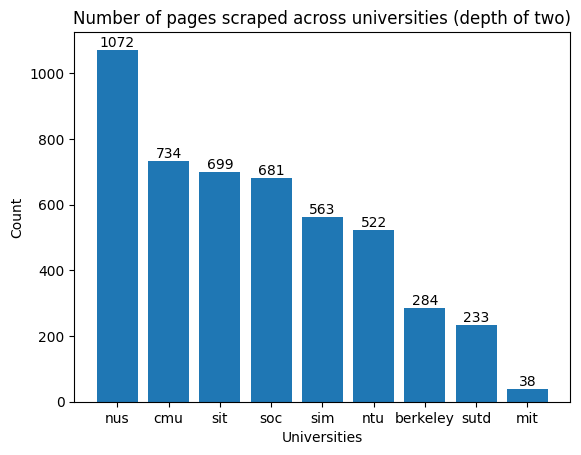

In [20]:
plt.bar(sorted_total_pages_dict.keys(), sorted_total_pages_dict.values())
plt.title('Number of pages scraped across universities (depth of two)')
for i in range(len(university_df)):
    plt.text(i, list(sorted_total_pages_dict.values())[i] + 10, list(sorted_total_pages_dict.values())[i], ha = 'center')
plt.xlabel('Universities')
plt.ylabel('Count')
plt.show()

Comparison of number of pages at each depth

In [8]:
depths = [0, 1, 2] # depth of two was scraped
def get_depth_dict(df):
    d = {}
    for i in depths:
        n = len(df[df['depth'] == i])
        d[int(i)] = n
    return d

depth_count_dict = {}
for i in range(len(university_df)):
    depth_count_dict[university_names[i]] = get_depth_dict(university_df[i])

sorted_depth_count_dict = dict(sorted(depth_count_dict.items(), key=lambda item: sum(item[1].values()), reverse=True))
print(sorted_depth_count_dict)

{'nus': {0: 1, 1: 38, 2: 1033}, 'cmu': {0: 1, 1: 43, 2: 690}, 'sit': {0: 1, 1: 131, 2: 567}, 'soc': {0: 1, 1: 95, 2: 585}, 'sim': {0: 1, 1: 110, 2: 452}, 'ntu': {0: 1, 1: 50, 2: 471}, 'berkeley': {0: 1, 1: 27, 2: 256}, 'sutd': {0: 1, 1: 34, 2: 198}, 'mit': {0: 1, 1: 17, 2: 20}}


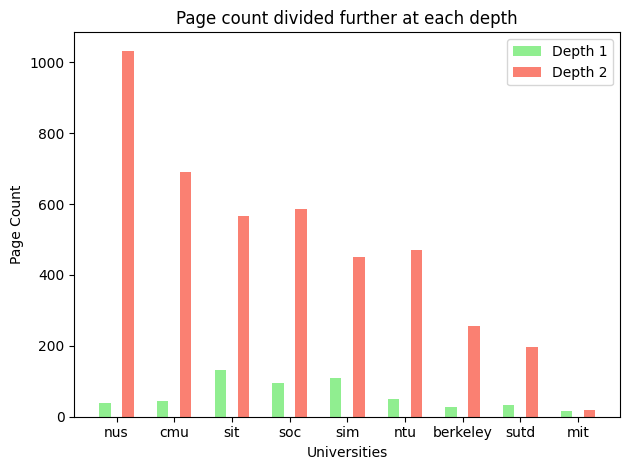

In [9]:
x = np.arange(len(university_df)) # x ticks

depth_1 = {uni: depth_info[1] for uni, depth_info in sorted_depth_count_dict.items()} # page count at depth 1
depth_2 = {uni: depth_info[2] for uni, depth_info in sorted_depth_count_dict.items()} # page count at depth 2

plt.bar(x - 0.2, depth_1.values(), 0.2, label='Depth 1', color='lightgreen')
plt.bar(x + 0.2, depth_2.values(), 0.2, label='Depth 2', color='salmon')
plt.xlabel('Universities')
plt.ylabel('Page Count')
plt.title('Page count divided further at each depth')
plt.xticks(x, sorted_depth_count_dict.keys())
plt.legend()
plt.tight_layout()
#plt.savefig("../browser-extension/images/graph2.png")
plt.show()

Comparison of categories across universities

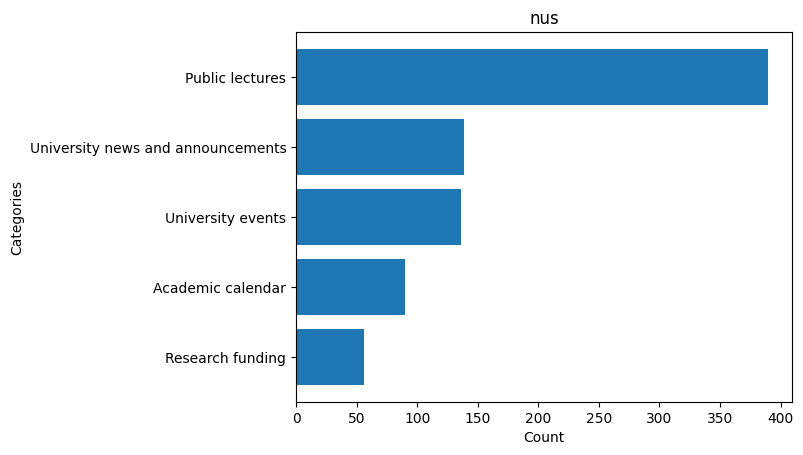

In [19]:
for i in range(len(university_df)):
    categories = university_df[i]['category'].value_counts()
    categories_df = categories.reset_index()
    categories_df.columns = ['category', 'count']
    
    plt.barh(categories_df['category'].head(5), categories_df['count'].head(5))
    plt.gca().invert_yaxis()
    plt.xlabel('Count')
    plt.title(f"{university_names[i]}")
    plt.ylabel('Categories')
    #plt.savefig("../browser-extension/images/graph3.png", bbox_inches='tight')
    plt.show()

Number of error pages

In [12]:
total_error_pages_dict = {} # dictionary to store error pages count

for i in range(len(university_df)):
    count = len(university_df[i][university_df[i]['category'] == 'Error page'])
    total_error_pages_dict[university_names[i]] = count

sorted_total_error_pages_dict = dict(sorted(total_error_pages_dict.items(), key=lambda item: item[1], reverse=True)) # sort
print(sorted_total_error_pages_dict)

{'nus': 39, 'cmu': 16, 'sutd': 11, 'soc': 3, 'berkeley': 3, 'ntu': 1, 'sit': 1, 'sim': 0, 'mit': 0}


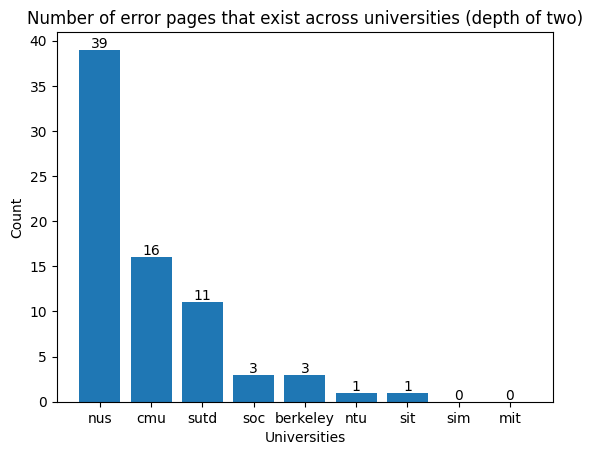

In [13]:
plt.bar(sorted_total_error_pages_dict.keys(), sorted_total_error_pages_dict.values())
plt.title('Number of error pages that exist across universities (depth of two)')
for i in range(len(university_df)):
    plt.text(i, list(sorted_total_error_pages_dict.values())[i] + 0.25, list(sorted_total_error_pages_dict.values())[i], ha = 'center')
plt.xlabel('Universities')
plt.ylabel('Count')
#plt.savefig("../browser-extension/images/graph4.png")

plt.show()

Comparison of the Highest number of links in a single page

In [14]:
num_links_dict = {} # dictionary to store the highest number of links

for i in range(len(university_df)):
    d = university_df[i].sort_values(by=['num_links'], ascending=False)['num_links']
    num_links_dict[university_names[i]] = d.iloc[0]

sorted_num_links_dict = dict(sorted(num_links_dict.items(), key=lambda item: item[1], reverse=True)) # sort
print(sorted_num_links_dict)

{'nus': np.int64(3097), 'berkeley': np.int64(949), 'sutd': np.int64(882), 'soc': np.int64(710), 'cmu': np.int64(674), 'sit': np.int64(624), 'ntu': np.int64(541), 'sim': np.int64(364), 'mit': np.int64(307)}


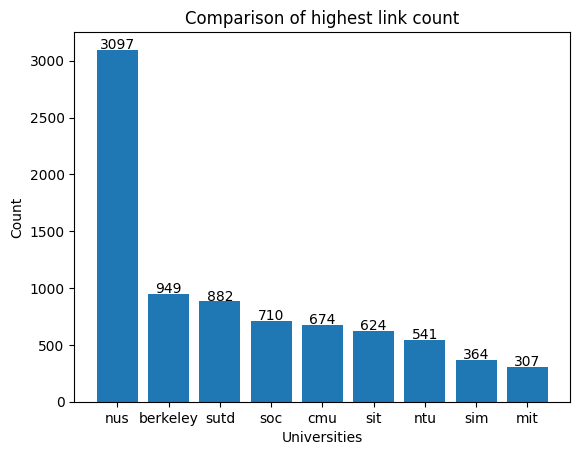

In [15]:
plt.bar(sorted_num_links_dict.keys(), sorted_num_links_dict.values())
plt.title('Comparison of highest link count')
for i in range(len(sorted_num_links_dict)):
    plt.text(i, list(sorted_num_links_dict.values())[i] + 10, list(sorted_num_links_dict.values())[i], ha = 'center')
plt.xlabel('Universities')
plt.ylabel('Count')
#plt.savefig("../browser-extension/images/graph5.png")

plt.show()


Comparision of highest number of images in a single page

In [16]:
num_images_dict = {} # dictionary to store the highest number of links

for i in range(len(university_df)):
    d = university_df[i].sort_values(by=['num_imgs'], ascending=False)['num_imgs']
    num_images_dict[university_names[i]] = d.iloc[0]

sorted_num_images_dict = dict(sorted(num_images_dict.items(), key=lambda item: item[1], reverse=True)) # sort
print(sorted_num_images_dict)

{'soc': np.int64(739), 'nus': np.int64(638), 'berkeley': np.int64(273), 'sim': np.int64(229), 'ntu': np.int64(214), 'sit': np.int64(121), 'cmu': np.int64(74), 'sutd': np.int64(44), 'mit': np.int64(19)}


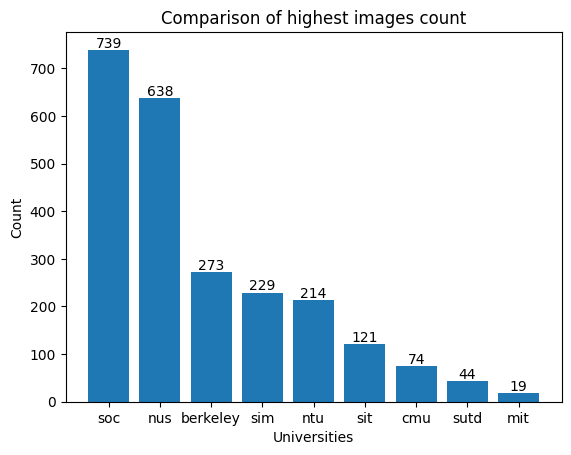

In [17]:
plt.bar(sorted_num_images_dict.keys(), sorted_num_images_dict.values())
plt.title('Comparison of highest images count')
for i in range(len(sorted_num_images_dict)):
    plt.text(i, list(sorted_num_images_dict.values())[i] + 5, list(sorted_num_images_dict.values())[i], ha = 'center')
plt.xlabel('Universities')
plt.ylabel('Count')
#plt.savefig("../browser-extension/images/graph6.png")

plt.show()